In [15]:
import pandas as pd
import seaborn as sns
import pingouin as pg
import warnings
warnings.filterwarnings("ignore")


<img src="https://github.com/ethanweed/ethanweed.github.io/blob/master/python-tutorials/images/Nettle_1998_abstract.png?raw=true" width="700"/>

## Data

Nettle recorded:

1. the *number of languages* 
1. the *area* (in km<sup>2</sup>) 
1. the *population* 
1. the *mean growing season* (MGS, in months) 
1. the number of weather stations measuring MGS
1. the standard deviation of the measurements of MGS from the different weather stations in each country.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/ethanweed.github.io/master/r-tutorials/data/nettle_1998.csv", sep=";")
df

,Country,Languages,Area,Population,Stations,MGS,GS_SD,Variable_GS,Used_in_1996
0,Algeria,18,2381741,25660,102,6.60,2.29,Y,N
1,Angola,42,1246700,10303,50,6.22,1.87,N,N
2,Australia,234,7713364,17336,134,6.00,4.17,Y,N
3,Bangladesh,37,143998,118745,20,7.40,0.73,N,N
4,Benin,52,112622,4889,7,7.14,0.99,N,Y
...,...,...,...,...,...,...,...,...,...
69,Vietnam,88,331689,68183,40,8.80,1.59,N,N
70,Yemen,6,527968,12302,2,0.00,0.00,N,N
71,Zaire,219,2344858,36672,16,9.44,1.90,N,N
72,Zambia,38,752618,8780,30,5.43,0.67,N,N


In [4]:
# Nettle reports the population data in 1000's, probably to save room in the data table, 
#but that is an unusual number to think about population in, so let's convert to millions. 
#While we're at it, let's convert km2 to millions, so that the number doesn't appear in scientific notation 
#on the x-axis
df['Population'] = df['Population']*1000/1000000
df['Area'] = df['Area']/1000000

# look at the first lines of the dataframe
df.head()

,Country,Languages,Area,Population,Stations,MGS,GS_SD,Variable_GS,Used_in_1996
0,Algeria,18,2.381741,25.660,102,6.60,2.29,Y,N
1,Angola,42,1.246700,10.303,50,6.22,1.87,N,N
2,Australia,234,7.713364,17.336,134,6.00,4.17,Y,N
3,Bangladesh,37,0.143998,118.745,20,7.40,0.73,N,N
4,Benin,52,0.112622,4.889,7,7.14,0.99,N,Y


## Plotting Correlations
- We can use seaborn to see if there is any clear relationship between these variables. 

- Is there a relationship countries' *area* and their *number of languages spoken*?  

- We can use the ``sns.regplot`` function to take a quick look.

<Axes: xlabel='Area', ylabel='Languages'>

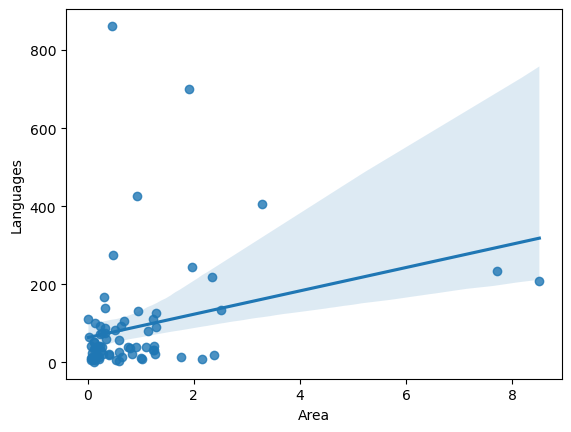

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sns.regplot(x = "Area", y = "Languages", data = df)

There does seem to be some sort of relationship here, but it is difficult to see on the plot. A few countries are outliers, and they are pushing all the other data down into the lower-left corner. By transforming the data to a logarithmic scale, we can stretch them out a bit, and make them easier to see. Let's add two more columns to the dataframe, with log-transformed versions of the Population and Area data:

In [10]:
df['Population_log'] = np.log(df['Population'])
df['Area_log'] = np.log(df['Area'])
df['Languages_log'] = np.log(df['Languages'])
df.tail()

,Country,Languages,Area,Population,Stations,MGS,GS_SD,Variable_GS,Used_in_1996,Population_log,Area_log,Languages_log
69,Vietnam,88,0.331689,68.183,40,8.80,1.59,N,N,4.222195,-1.103557,4.477337
70,Yemen,6,0.527968,12.302,2,0.00,0.00,N,N,2.509762,-0.638720,1.791759
71,Zaire,219,2.344858,36.672,16,9.44,1.90,N,N,3.602014,0.852225,5.389072
72,Zambia,38,0.752618,8.780,30,5.43,0.67,N,N,2.172476,-0.284197,3.637586
73,Zimbabwe,18,0.390759,10.019,52,5.29,1.43,N,N,2.304483,-0.939664,2.890372


Now the relationship is a little easier to see:

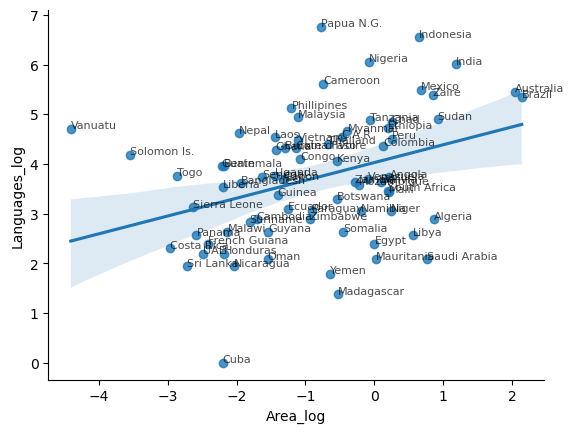

In [79]:
# Plot the log-transformed data
sns.regplot(x = "Area_log", y = "Languages_log", data = df)

# Add labels for each point
for idx, row in df.iterrows():
    plt.annotate(row['Country'], 
                 (row['Area_log'], row['Languages_log']),
                 fontsize=8,
                 alpha=0.7)
    
sns.despine()

In [62]:
# Do the number of languages correlate with the area?
pg.corr(df['Area_log'], df['Languages_log'])


,n,r,CI95%,p-val,BF10,power
pearson,74,0.357975,"[0.14, 0.54]",0.001739,17.773,0.887812


The output tells us that there is a positive correlation between the number of languages and the area of the country. We can see this in the correlation coefficient (cor) which is 0.29. The correlation coefficient is a number between 1 and -1, with 1 indicating a perfect positive correlation, and -1 indicating a perfect negative correlation. The p-value of the correlation indicates how confident we can be in the fit of the model.

## Correlation Matrix

Sometimes it can be useful to look at all the correlations between all of the variables in a dataset at once. This can be done with a correlation matrix. However, we should be careful about reading too much into a correlation matrix: it just tells us how much the variables correlate with each other. In order to be more rigorous about making predictions, we will need to build linear models.

In [63]:
pg.pairwise_corr(data = df, columns = ['Languages_log', 'Area_log', 'Population_log', 'MGS'])

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Languages_log,Area_log,pearson,two-sided,74,0.357975,"[0.14, 0.54]",1.739348e-03,17.773,0.887812
1,Languages_log,Population_log,pearson,two-sided,74,0.445685,"[0.24, 0.61]",6.909997e-05,341.257,0.982250
2,Languages_log,MGS,pearson,two-sided,74,0.312588,"[0.09, 0.51]",6.697624e-03,5.338,0.782704
3,Area_log,Population_log,pearson,two-sided,74,0.565891,"[0.39, 0.7]",1.486966e-07,1.091e+05,0.999745
4,Area_log,MGS,pearson,two-sided,74,-0.369410,"[-0.55, -0.15]",1.199198e-03,24.871,0.907691
5,Population_log,MGS,pearson,two-sided,74,-0.084131,"[-0.31, 0.15]",4.760523e-01,0.186,0.110027


In [21]:
print( df[['Languages','Area', 'Population', 'MGS']].corr())

            Languages      Area  Population       MGS
Languages    1.000000  0.290502    0.408753  0.241796
Area         0.290502  1.000000    0.333082 -0.127708
Population   0.408753  0.333082    1.000000 -0.017172
MGS          0.241796 -0.127708   -0.017172  1.000000


## Modelling a Relationship as a Linear Regression

In the plot above, we used a linear model to draw the line between the points. The straight line in the plot is a linear model, that minimizes the distance between the line and every individual point. 

If we generate some random numbers to create white noise, then the line should be close to horizontal. 

We can test this by generating some white noise data. Here we create a vector of 1000 random numbers between 0 and 100 plotted against 1000 other random numbers between 0 and 100:

In [31]:
from random import seed
from random import randint
seed(42)
x = []
y = []
for _ in range(1000):
    xvalue = randint(0, 100)
    yvalue = randint(0, 100)
    x.append(xvalue)
    y.append(yvalue)

df_random = pd.DataFrame(
    {'x': x,
     'y': y})     

df_random.head()

,x,y
0,81,14
1,3,94
2,35,31
3,28,17
4,94,13


Then we can fit a linear regression model to the data:

Text(0.5, 1.0, 'White Noise')

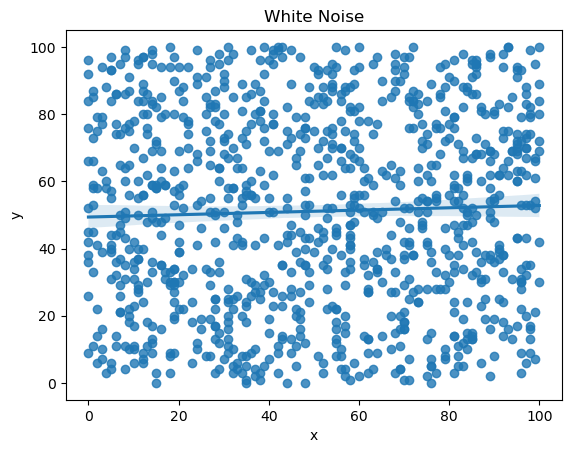

In [32]:
sns.regplot(x = "x", y = "y", data = df_random).set_title('White Noise')

If we were in doubt, our correlation matrix shows us that there is very little correlation between these two vectors of random numbers:

In [35]:
pg.corr(df_random['x'], df_random['y'])

,n,r,CI95%,p-val,BF10,power
pearson,1000,0.035471,"[-0.03, 0.1]",0.26244,0.074,0.201748


The equation of a line is $y=mx+y_0$, where $y_0$ is the point at which the line intercepts the y-axis. 

This is sometimes also written as $y=mx+b$, or $y=ax+b$. These equations are all equivalant. 

The important thing for our purposes is that they define the slope and intercept of a line which represents a *linear model* of the data.

Linear models are *very* useful, and they are all over the place in statistics. In the case of our random, white-noise data, because the slope is nearly equal to zero, the intercept of the model is a very close approximation of the mean of y:

In [46]:
print('Mean of y =', df_random['y'].mean())

# get intercept from the linear regression model with pingouin
mod = pg.linear_regression(df_random['x'], df_random['y'])
print('Intercept of the linear model:', mod['coef'][0])

Mean of y = 51.097
Intercept of the linear model: 49.36894399313464


# Modelling Number of Languages as a Linear Function of Area

In [61]:
pg.linear_regression(df['Area_log'], df['Languages_log']).round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.028,0.17,23.739,0.000,0.128,0.116,3.690,4.366
1,Area_log,0.358,0.11,3.253,0.002,0.128,0.116,0.139,0.578




But Area isn't the only thing correlated with the number of languages. 

Population size looks like it might also be a relevant factor:

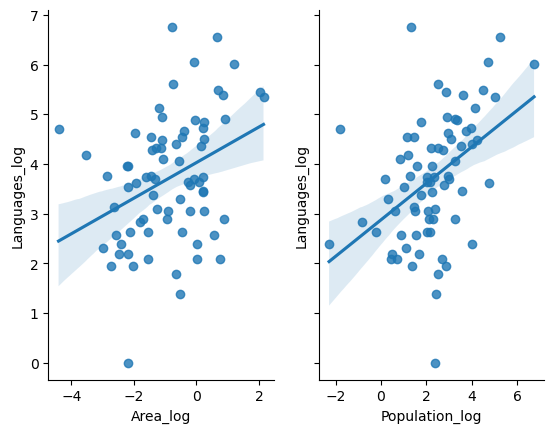

In [59]:
fig, axs = plt.subplots(ncols=2, sharey = True)
sns.regplot(x = "Area_log", y = "Languages_log", data = df, ax=axs[0])
sns.regplot(x = "Population_log", y = "Languages_log", data = df, ax=axs[1])
sns.despine()

## Multiple Regression
By adding Population as a second *predictor variable*, we can estimate the relative importance of both Area and Population in predicting the Number of Languages:

In [68]:
pg.linear_regression(df[['Area_log', 'Population_log']], df['Languages_log']).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,3.18,0.34,9.23,0.00,0.22,0.19,2.49,3.86
1,Area_log,0.16,0.13,1.22,0.23,0.22,0.19,-0.10,0.41
2,Population_log,0.29,0.11,2.80,0.01,0.22,0.19,0.09,0.50


In [70]:
pg.linear_regression(df[['Area_log', 'Population_log', 'MGS']], df['Languages_log']).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.18,0.37,5.93,0.00,0.41,0.38,1.45,2.91
1,Area_log,0.38,0.12,3.14,0.00,0.41,0.38,0.14,0.62
2,Population_log,0.22,0.09,2.38,0.02,0.41,0.38,0.04,0.41
3,MGS,0.19,0.04,4.74,0.00,0.41,0.38,0.11,0.27
